In [1]:
#import pandas as pd
#import numpy as np
#csv_df = pd.read_csv("sample_file.csv")
#csv_df.to_csv("sample_file.csv", index = False)
#excel_pd = pd.read_excel("sample_file.xlsx")
#excle_pd .to_excel("sample_fle.xlsx")
#html_pd = pd.read_html("http://webpage.com/sampledata.html")
#html_pd.to_html("sample_file.html")


In [10]:
import pandas as pd
import numpy as np
url = "http://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true"
fuel_data = pd.read_csv(url, error_bad_lines = False)
fuel_data.describe(include = "all")# desribe data
fuel_data.isnull().sum()#check for NaN
fuel_data.groupby("fuel_unit")["fuel_unit"].count()#count unique values
fuel_data[["fuel_unit"]] = fuel_data[["fuel_unit"]].fillna(value = "mcf")
#fuel_data.isnull().sum()#check if all is ok
#fuel_data.groupby("report_year")["report_year"].count()


In [11]:
#fuel_data.groupby("fuel_type_code_pudl").first()#group by col in df "fuel_type"

In [62]:
#split fuel_data into two groups
fuel_df1 = fuel_data.iloc[0 : 19000].reset_index(drop = True)
fuel_df2 = fuel_data.iloc[19000 : ].reset_index(drop = True)
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))#check length 
#pd.merge(fuel_df1, fuel_df2, how = "inner")# inner merge lose rows not common


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [12]:
#pd.merge(fuel_df1, fuel_df2, how = "outer")#all rows

In [6]:
#pd.concat([fuel_data, data_to_concat]).reset_index(drop = True)# join and keep index

In [13]:
#fuel_data.duplicated().any()

Text(0.5, 0, 'Fuel Unit')

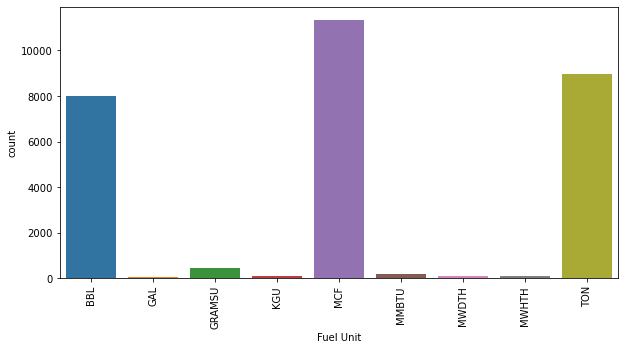

In [22]:
# plot data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
fuel_unit = pd.DataFrame({"unit" : ["BBL", "GAL", "GRAMSU", "KGU", "MCF", "MMBTU", "MWDTH", "MWHTH", "TON"],
                         "count" : [7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data = fuel_unit, x = "unit", y = "count")
plt.xlabel("Fuel Unit")
#plt.ylabel("Quantity")

Text(0.5, 0, 'Fuel Unit')

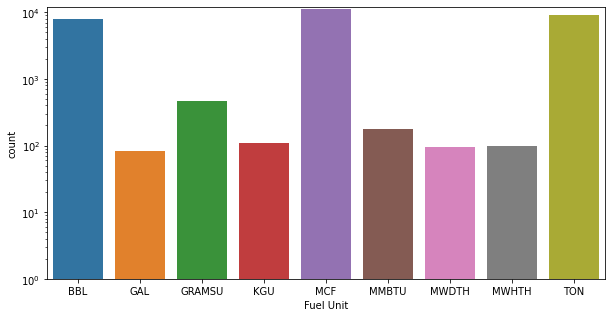

In [26]:
# extreme range. use log arg for better comparison
plt.figure(figsize = (10,5))
g = sns.barplot(data = fuel_unit, x = "unit", y = "count")
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel("Fuel Unit")

<AxesSubplot:xlabel='utility_id_ferc1', ylabel='fuel_cost_per_mmbtu'>

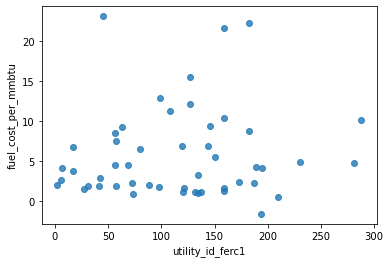

In [29]:
#select a random sample to plot
sample_df = fuel_data.sample(n = 50, random_state = 4)
sns.regplot(x = sample_df["utility_id_ferc1"], y = sample_df["fuel_cost_per_mmbtu"], fit_reg = False)

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='utility_id_ferc1'>

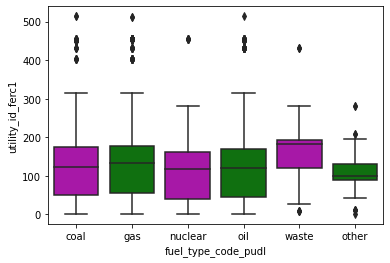

In [30]:
# box plot
sns.boxplot(x = "fuel_type_code_pudl", y = "utility_id_ferc1", palette = ["m", "g"], data = fuel_data)

<AxesSubplot:xlabel='fuel_cost_per_unit_burned', ylabel='Density'>

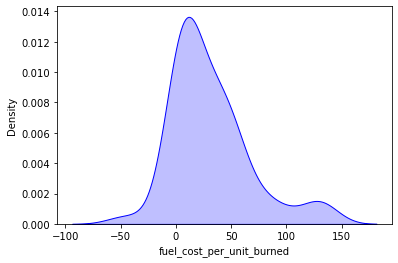

In [32]:
#kernel density estimate (kde) plot
sns.kdeplot(sample_df["fuel_cost_per_unit_burned"], shade = True, color = "b")